In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import seaborn as sns 


In [2]:
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [3]:
df["carat"] = 10*df["carat"]

df["cut"] = df["cut"].apply(lambda x: x.replace("Fair","0"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Very Good","2"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Good","1"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Ideal","3"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Premium","4"))
df["cut"] = df["cut"].astype(int)

df["color"] = df["color"].apply(lambda x: x.replace("D","10"))
df["color"] = df["color"].apply(lambda x: x.replace("E","9"))
df["color"] = df["color"].apply(lambda x: x.replace("F","8"))
df["color"] = df["color"].apply(lambda x: x.replace("G","6"))
df["color"] = df["color"].apply(lambda x: x.replace("H","5"))
df["color"] = df["color"].apply(lambda x: x.replace("I","4"))
df["color"] = df["color"].apply(lambda x: x.replace("J","0"))
df["color"] = df["color"].astype(int)

df["clarity"] = df["clarity"].apply(lambda x: x.replace("SI1","3"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("SI2","2"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("I1","0"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("IF","10"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VVS1","9"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VVS2","8"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VS1","7"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VS2","6"))
df["clarity"] = df["clarity"].astype(int)


In [4]:
df["total"] = df["cut"] + df["color"]
df["total"] = df["total"] + df["clarity"]

In [5]:
df["total size"] = df["x"] + df["y"]
df["total size"] = df["total size"] + df["z"]

<AxesSubplot:>

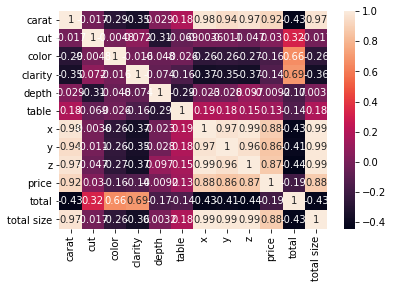

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
df[df["price"] > 1800].sort_values(by="price", ascending=False).tail(50)

,carat,cut,color,clarity,depth,table,x,y,z,price,total,total size
23402,6.7,4,8,3,61.3,59.0,5.65,5.63,3.46,1809,15,14.74
22087,9.6,0,5,0,60.1,62.0,6.21,6.00,3.68,1808,5,15.89
6239,6.0,4,10,6,60.9,61.0,5.43,5.40,3.30,1808,20,14.13
16121,7.0,4,5,2,60.5,61.0,5.75,5.72,3.47,1808,11,14.94
2726,5.0,3,10,6,61.2,55.0,5.12,5.07,3.12,1808,19,13.31
2323,6.2,3,5,7,63.0,56.0,5.43,5.36,3.40,1808,15,14.19
34470,7.1,4,6,2,59.9,59.0,5.82,5.79,3.48,1808,12,15.09
39895,5.3,4,10,6,60.2,58.0,5.23,5.26,3.16,1808,20,13.65
16552,9.6,0,5,0,67.4,62.0,6.13,5.96,4.08,1808,5,16.17
30063,7.0,2,5,2,63.8,59.0,5.60,5.63,3.58,1807,9,14.81


In [8]:
# df.drop(df[df["carat"] > 28].index, inplace=True)

In [9]:
df[df["price"] < 800].sort_values(by="price", ascending=False).tail(40)

,carat,cut,color,clarity,depth,table,x,y,z,price,total,total size
10534,3.1,1,0,3,63.5,55.0,4.30,4.33,2.74,363,4,11.37
34316,3.1,2,0,3,61.9,59.0,4.28,4.32,2.66,363,5,11.26
6356,3.1,2,0,3,62.7,59.0,4.29,4.32,2.70,363,5,11.31
10657,2.4,2,9,6,60.8,56.0,4.02,4.04,2.45,362,17,10.51
21095,2.3,2,10,6,62.7,58.0,3.86,3.89,2.43,362,18,10.18
22894,2.4,2,9,6,64.1,59.0,3.88,3.92,2.50,362,17,10.30
29482,2.6,3,5,2,62.5,53.0,4.09,4.13,2.57,362,10,10.79
9248,2.5,0,9,7,55.2,64.0,4.21,4.23,2.33,361,16,10.77
7716,3.2,1,10,0,64.0,54.0,4.33,4.36,2.78,361,11,11.47
22650,2.5,1,9,7,63.3,60.0,3.99,4.04,2.54,361,17,10.57


In [10]:
X = np.array(df[["carat", "total size"]])
y = np.array(df["price"])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 235)

In [12]:
svr_rbf = SVR(kernel='rbf', C=10000, gamma="auto", epsilon=0.1, max_iter=999999)
svr_rbf.fit(X_train, y_train)

SVR(C=10000, gamma='auto', max_iter=999999)

In [13]:
y_test_pred = svr_rbf.predict(X_test)
print(r2_score(y_test, y_test_pred))
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.8752372385890796


1371.651371020685

In [14]:
# C = 10000/ 555.1367153891555

# x --> 550.8611897991423
# y --> 541.3904810385991
# z --> 546.4043006671172
# y, z --> 536.5606726074334

In [15]:
pd.DataFrame({"y_test":y_test,"y_pred": y_test_pred})

,y_test,y_pred
0,2041,1978.856515
1,640,938.304838
2,3583,4253.910855
3,616,775.946099
4,1243,1671.481323
...,...,...
8064,11262,7484.786300
8065,1376,969.154369
8066,1346,1779.046001
8067,11040,6459.637694


### PREDECIR TEST

In [16]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)

In [17]:
X_pred["carat"] = 10*X_pred["carat"]

In [18]:
X_pred["total size"] = X_pred["x"] + df["y"]
X_pred["total size"] = X_pred["total size"] + df["z"]

In [19]:
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Fair","0"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Very Good","2"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Good","1"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Ideal","3"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Premium","4"))
X_pred["cut"] = X_pred["cut"].astype(int)

In [20]:


X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("D","10"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("E","9"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("F","8"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("G","6"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("H","5"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("I","4"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("J","0"))
X_pred["color"] = X_pred["color"].astype(int)

X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("SI1","3"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("SI2","2"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("I1","0"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("IF","10"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VVS1","9"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VVS2","8"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VS1","7"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VS2","6"))
X_pred["clarity"] = X_pred["clarity"].astype(int)


In [21]:
X_pred = np.array(X_pred[["carat","total size"]])

In [22]:
pd.DataFrame(X_pred)

,0,1
0,3.0,15.34
1,3.4,11.35
2,15.7,15.36
3,3.1,10.97
4,15.1,17.95
...,...,...
13444,10.5,17.63
13445,2.7,14.51
13446,15.0,16.08
13447,17.0,15.45


In [23]:
predictions_submit = svr_rbf.predict(X_pred)
predictions_submit

array([4711.44759657,  745.08124235, 6856.65204559, ..., 7668.73625915,
       8154.14582278,  666.37561403])

In [24]:
pd.DataFrame(predictions_submit)

,0
0,4711.447597
1,745.081242
2,6856.652046
3,700.969839
4,6236.166973
...,...
13444,5546.160279
13445,3853.229059
13446,7668.736259
13447,8154.145823


In [25]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [26]:
submission.to_csv("submission5.csv", index = False)